# Experiment 1

In [1]:

%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp1'

In [2]:
targets = ["multi", "load", "solar", "wind"] 
horizons = ['24', '96', '192', '336', '720']  
models = ['iTransformer', 'PatchTST', 'Autoformer', 'Informer', 'Transformer', 'TSMixer', 'DLinear', "LSTM", "XGBoost", "Linear Regression", "Dummy"]  
metrics = ['MSE', 'MAE']  

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

# Retrieve color cycle from ggplot style
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#print(colors)

# Map models to specific colors
color_map = {'iTransformer': colors[0], 'PatchTST': colors[1], 'Autoformer': colors[2], 'Informer': colors[3], 'Transformer': colors[4], 
             'TSMixer': colors[5], 'DLinear': colors[6], 'LSTM': colors[7], 
             'XGBoost': colors[8], 'Linear Regression': colors[9]}



## Import data and plot all benchmark results

In [3]:
benchmark_table_with_dummy = pd.read_csv("./../../results/benchmark_table_Exp1_metrics.csv", header=[0, 1], index_col=[0, 1])
epoch_time_table = pd.read_csv("./../../results/benchmark_table_Exp1_epoch_time.csv", header=[0, 1], index_col=[0, 1])
modelsize_maxmemory_table = pd.read_csv("./../../results/benchmark_table_Exp1_modelsize_maxmemory.csv", header=[0, 1], index_col=[0, 1])
std_table = pd.read_csv("./../../results/benchmark_table_Exp1_std.csv", header=[0, 1], index_col=[0, 1])
benchmark_table = benchmark_table_with_dummy.drop(columns="Dummy")

skill_table = 1 - benchmark_table_with_dummy / benchmark_table_with_dummy["Dummy"]

epoch_time_table = epoch_time_table.drop(columns="Dummy")
benchmark_table_with_dummy

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/1350505923.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  benchmark_table = benchmark_table_with_dummy.drop(columns="Dummy")
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/1350505923.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  epoch_time_table = epoch_time_table.drop(columns="Dummy")


Model          iTransformer         PatchTST         Autoformer          \
Metric                  MSE     MAE      MSE     MAE        MSE     MAE   
Target Horizon                                                            
multi  24            0.2310  0.2812   0.2060  0.2722     0.3250  0.3587   
       96            0.4693  0.4161   0.4137  0.4017     0.5664  0.4914   
       192           0.5347  0.4478   0.4682  0.4347     0.5893  0.5011   
       336           0.5899  0.4736   0.4990  0.4560     0.5936  0.5127   
       720           0.6193  0.4904   0.5365  0.4822     0.6364  0.5360   
load   24            0.0280  0.1108   0.0265  0.1118     0.0472  0.1616   
       96            0.0520  0.1604   0.0659  0.1764     0.0673  0.1939   
       192           0.0649  0.1802   0.0802  0.1982     0.0820  0.2136   
       336           0.0786  0.1981   0.0843  0.2040     0.1030  0.2382   
       720           0.0949  0.2215   0.0908  0.2153     0.1212  0.2586   
solar  24            0.1054  0.1630   0.1009  0.1690     0.1248  0.2144   
       96            0.1790  0.2231   0.1651  0.2228     0.1954  0.2732   
       192           0.2095  0.2445   0.1892  0.2390     0.2340  0.3077   
       336           0.2322  0.2546   0.2039  0.2531     0.3175  0.3693   
       720           0.2735  0.2796   0.2275  0.2672     0.3074  0.3682   
wind   24            0.5117  0.5054   0.4574  0.4829     0.6098  0.5914   
       96            1.0871  0.7712   0.9423  0.7463     1.2946  0.8768   
       192           1.2537  0.8442   1.0716  0.8113     1.3714  0.9150   
       336           1.3620  0.8836   1.1396  0.8419     1.3934  0.9484   
       720           1.4345  0.9164   1.1966  0.8675     1.5710  0.9738   

Model          Informer         Transformer          ... DLinear          \
Metric              MSE     MAE         MSE     MAE  ...     MSE     MAE   
Target Horizon                                       ...                   
multi  24        0.2150  0.2843      0.2235  0.3002  ...  0.2532  0.3210   
       96        0.4441  0.4467      0.4429  0.4479  ...  0.4614  0.4436   
       192       0.5076  0.4795      0.4833  0.4691  ...  0.5185  0.4746   
       336       0.5115  0.4714      0.5005  0.4782  ...  0.5603  0.4975   
       720       0.5228  0.4752      0.5208  0.4932  ...  0.6032  0.5274   
load   24        0.0320  0.1304      0.0280  0.1191  ...  0.0498  0.1448   
       96        0.0719  0.1983      0.0538  0.1710  ...  0.0925  0.2031   
       192       0.0794  0.2100      0.0679  0.1909  ...  0.1097  0.2236   
       336       0.0857  0.2195      0.0791  0.2137  ...  0.1261  0.2460   
       720       0.1198  0.2637      0.1107  0.2537  ...  0.1489  0.2790   
solar  24        0.1030  0.1653      0.1101  0.1692  ...  0.1173  0.1773   
       96        0.1599  0.2179      0.1734  0.2291  ...  0.1799  0.2193   
       192       0.1916  0.2410      0.1923  0.2459  ...  0.2104  0.2388   
       336       0.2040  0.2512      0.1991  0.2512  ...  0.2346  0.2563   
       720       0.2333  0.2812      0.2081  0.2592  ...  0.2948  0.3018   
wind   24        0.4773  0.5053      0.4808  0.5155  ...  0.4484  0.4741   
       96        1.0290  0.8069      0.9867  0.8103  ...  0.9223  0.7267   
       192       1.1434  0.8834      1.1374  0.8908  ...  1.0524  0.7914   
       336       1.2006  0.9090      1.2184  0.9267  ...  1.1224  0.8253   
       720       1.2595  0.9540      1.2322  0.9322  ...  1.1780  0.8522   

Model             LSTM         XGBoost         Linear Regression          \
Metric             MSE     MAE     MSE     MAE               MSE     MAE   
Target Horizon                                                             
multi  24       0.2229  0.2968  0.2395  0.2799            0.2026  0.2732   
       96       0.4361  0.4369  0.4553  0.4015            0.4002  0.4070   
       192      0.4981  0.4723  0.5130  0.4308            0.4652  0.4502   
       336      0.5024  0.4776  0.5331  0.4437            0.4966  0.4

# Plot again but highlight best value

In [4]:
def highlight_min(s):
    '''
    Highlight the minimum in a Series green.
    '''
    s_mse = s.xs("MSE", axis=0, level=1)
    is_min_mse = s_mse == s_mse.min()
    s_mae = s.xs("MAE", axis=0, level=1)
    is_min_mae = s_mae == s_mae.min()

    is_min = s.copy()
    
    is_min.loc[:,"MSE"] = is_min_mse.values
    is_min.loc[:,"MAE"] = is_min_mae.values

    return ['background-color: green' if v else '' for v in is_min]

styled_df = benchmark_table.style.apply(highlight_min, axis=1)
styled_df

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/81131224.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False False False False False False False  True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_min.loc[:,"MSE"] = is_min_mse.values
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/81131224.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False False False False False  True False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_min.loc[:,"MSE"] = is_min_mse.values
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/81131224.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False  True False

In [5]:
#iTransformer:  7, 7
#PatchTST:      8, 6
#Autoformer:    0, 0
#Informer:      3, 3
#Transformer:   4, 4

#TSMixer:       2, 2
#DLinear:       8, 1
#LSTM           4, 0
#XGBoost:       8, 4
#LR:            5, 0

#Insgesamt: 40, 20



## Skill table for dummy, where skill = 1 - MSE_model / MSE_dummy

In [6]:
def color_scale(val):
    # Normalize the value to the range [0, 1] from the original range of [-1, 1]
    normalized = (val + 0.7) / 2
    # Convert to RGB color
    red = 190 * (1 - normalized)
    green = 255 * normalized
    blue = 50
    return f'background-color: rgb({int(red)}, {int(green)}, {blue})'

styled_df = skill_table.style.applymap(color_scale)
styled_df

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/2519770715.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = skill_table.style.applymap(color_scale)


## Skill table for linear regression, where skill = 1 - MSE_model / MSE_lr

In [7]:
skill_table2 = 1 - benchmark_table/benchmark_table["Linear Regression"]
styled_df_2 = skill_table2.style.applymap(color_scale)
styled_df_2

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/1327961144.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df_2 = skill_table2.style.applymap(color_scale)


In [8]:
# Calculate the number of times a model has been the best model
MSE_values = benchmark_table.xs("MSE", axis=1, level=1).round(3)
MAE_values = benchmark_table.xs("MAE", axis=1, level=1).round(3)
models_min_MSE = MSE_values.min(axis=1)
models_min_MAE = MAE_values.min(axis=1)
counter = {model: 0 for model in models if model != "Dummy"}

for i, row in enumerate(MSE_values.iterrows()):
    best_models = row[1][row[1] == models_min_MSE.iloc[i]].index
    for model in best_models:
        counter[model] +=1

for i, row in enumerate(MAE_values.iterrows()):
    best_models = row[1][row[1] == models_min_MAE.iloc[i]].index
    for model in best_models:
        counter[model] +=1

best_model_counter = pd.Series(counter)
print(best_model_counter)

# Calculate the number of times a model has been the best model without wind and multi row

benchmark_table_without_wind_multi = benchmark_table.drop(["wind", "multi"], level=0, axis=0).round(3)
MSE_values = benchmark_table_without_wind_multi.xs("MSE", axis=1, level=1)
MAE_values = benchmark_table_without_wind_multi.xs("MAE", axis=1, level=1)
models_min_MSE = MSE_values.min(axis=1)
models_min_MAE = MAE_values.min(axis=1)
counter = {model: 0 for model in models if model != "Dummy"}

for i, row in enumerate(MSE_values.iterrows()):
    best_models = row[1][row[1] == models_min_MSE.iloc[i]].index
    for model in best_models:
        counter[model] +=1

for i, row in enumerate(MAE_values.iterrows()):
    best_models = row[1][row[1] == models_min_MAE.iloc[i]].index
    for model in best_models:
        counter[model] +=1

best_model_counter_without_wind_multi = pd.Series(counter)
print(best_model_counter_without_wind_multi)

#iTransformer:  7, 7
#PatchTST:      8, 6
#Autoformer:    0, 0
#Informer:      3, 3
#Transformer:   4, 4

#TSMixer:       2, 2
#DLinear:       8, 1
#LSTM           4, 0
#XGBoost:       8, 4
#LR:            5, 0

#Insgesamt: 40, 20

iTransformer         7
PatchTST             8
Autoformer           0
Informer             3
Transformer          4
TSMixer              2
DLinear              8
LSTM                 4
XGBoost              7
Linear Regression    5
dtype: int64
iTransformer         7
PatchTST             6
Autoformer           0
Informer             3
Transformer          4
TSMixer              2
DLinear              1
LSTM                 0
XGBoost              3
Linear Regression    0
dtype: int64


In [9]:
avg = benchmark_table.sum(axis=0)/benchmark_table.shape[0]
benchmark_table_without_wind = benchmark_table.drop(index="wind").drop(index="multi")
benchmark_table_wind_only = benchmark_table.drop(index="load").drop(index="solar")
avg_without_wind = benchmark_table_without_wind.sum(axis=0)/benchmark_table_without_wind.shape[0]
avg_wind_only = benchmark_table_wind_only.sum(axis=0)/benchmark_table_wind_only.shape[0]
#print(avg_without_wind)
#stds = epoch_time_table.std(axis=0)

#print(averages)
#print(stds)
avg_mse = avg.loc[pd.IndexSlice[:, 'MSE']]
avg_mse_without_wind = avg_without_wind.loc[pd.IndexSlice[:, 'MSE']]
avg_mse_wind_only = avg_wind_only.loc[pd.IndexSlice[:, 'MSE']]

#std1 = stds.loc[pd.IndexSlice[:, 'MSE']]
#print(pd.concat((averages1,std1), axis=1))
#print(averages1)

avg_mae = avg.loc[pd.IndexSlice[:, 'MAE']]
avg_mae_without_wind = avg_without_wind.loc[pd.IndexSlice[:, 'MAE']]
avg_mae_wind_only = avg_wind_only.loc[pd.IndexSlice[:, 'MAE']]
#std2 = stds.loc[pd.IndexSlice[:, 'time[min]']]
#print(pd.concat((averages2,std2), axis=1))
#print(averages2)

avg = (avg_mse + avg_mae) / 2
avg_without_wind = (avg_mse_without_wind + avg_mae_without_wind) / 2
avg_wind_only = (avg_mse_wind_only + avg_mae_wind_only) / 2
imp_over_lr = round((1- (avg / avg.loc["Linear Regression"])) * 100).astype(int)
imp_over_lr_without_wind = round((1 - avg_without_wind / avg_without_wind.loc["Linear Regression"]) * 100).astype(int)
imp_over_lr_wind_only = round((1 - avg_wind_only / avg_wind_only.loc["Linear Regression"]) * 100).astype(int)

#print(avg)
#print(avg_without_wind)
print("Improvement over Linear Regression")
print(imp_over_lr)
print("\n")
print("Improvement over Linear Regression without wind")
print(imp_over_lr_without_wind)
print("\n")
print("Improvement over Linear Regression wind (and multi) only")
print(imp_over_lr_wind_only)

Improvement over Linear Regression
Model
iTransformer         -5
PatchTST              4
Autoformer          -19
Informer             -2
Transformer          -1
TSMixer              -6
DLinear              -1
LSTM                  2
XGBoost              -4
Linear Regression     0
dtype: int64


Improvement over Linear Regression without wind
Model
iTransformer         10
PatchTST             12
Autoformer          -12
Informer              7
Transformer          11
TSMixer             -18
DLinear              -3
LSTM                  3
XGBoost               2
Linear Regression     0
dtype: int64


Improvement over Linear Regression wind (and multi) only
Model
iTransformer         -9
PatchTST              2
Autoformer          -21
Informer             -5
Transformer          -4
TSMixer              -2
DLinear              -1
LSTM                  1
XGBoost              -6
Linear Regression     0
dtype: int64


/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/1266457852.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  benchmark_table_without_wind = benchmark_table.drop(index="wind").drop(index="multi")
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/1266457852.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  benchmark_table_wind_only = benchmark_table.drop(index="load").drop(index="solar")


In [10]:
impr = pd.concat((imp_over_lr, imp_over_lr_without_wind, best_model_counter, best_model_counter_without_wind_multi), axis=1)
print(impr)
#print(best_model_counter)

impr.to_latex("./../../results/benchmark_table_Exp1_metrics_impr.tex")
#best_model_counter.to_latex("./../../results/benchmark_table_Exp1_metrics_best_model_counter.tex")

                    0   1  2  3
iTransformer       -5  10  7  7
PatchTST            4  12  8  6
Autoformer        -19 -12  0  0
Informer           -2   7  3  3
Transformer        -1  11  4  4
TSMixer            -6 -18  2  2
DLinear            -1  -3  8  1
LSTM                2   3  4  0
XGBoost            -4   2  7  3
Linear Regression   0   0  5  0


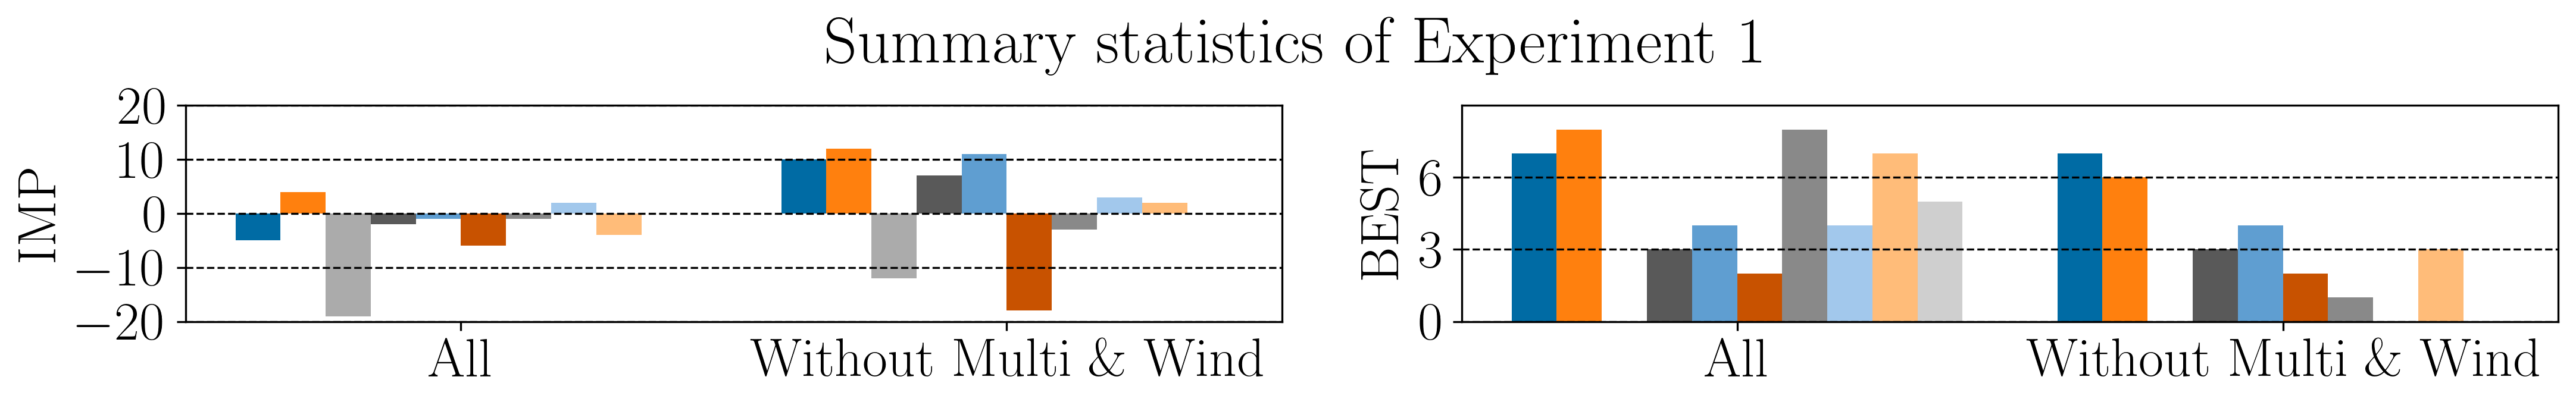

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
import numpy as np


overview_imp = impr.T.loc[:1,:]
overview_best = impr.T.loc[2:,:]
bar_width = 1 / (len(overview_imp.columns) + 1) *2   # Width of each bar, adjusted for number of models
#print(overview_best)
#print(overview_imp)
for i, model in enumerate(overview_imp.columns):
    positions = np.array([0,2.2]) + i * bar_width
    ax[0].bar(positions, overview_imp.loc[:,:][model], width=bar_width, color=color_map[model], label=model if i == 0 else "")
    ax[1].bar(positions, overview_best.loc[:,:][model], width=bar_width, color=color_map[model], label=model if i == 0 else "")
    #ax[0].set_title("Improvement")
    #ax[1].set_title("Best Model")
    ax[0].set_xticks(np.array([0,2.2]) + bar_width * (len(overview_imp.columns) - 1) / 2)  # Setting x-ticks to be at the center of the group
    ax[1].set_xticks(np.array([0,2.2]) + bar_width * (len(overview_imp.columns) - 1) / 2)  # Setting x-ticks to be at the center of the group
    #print(horizons)
    ax[0].set_xticklabels(["All", "Without Multi \& Wind"]),# rotation=45)  # Assuming horizons are like 0h, 1h, etc.
    ax[1].set_xticklabels(["All", "Without Multi \& Wind"]) #, rotation=45)  # Rotate

    ax[0].set_ylabel("IMP")
    ax[1].set_ylabel("BEST")

    #Show grid lines
    ax[0].grid(True, axis='y', color='black', linestyle='--')
    ax[0].set_ylim(-20, 20)
    ax[0].set_yticks(np.arange(-20, 21, 10))
    ax[1].grid(True, axis='y', color='black', linestyle='--')
    ax[1].set_ylim(0, 9)
    ax[1].set_yticks(np.arange(0, 9, 3))
#ax[0].bar(positions, bm_mse[model], width=0.1, color=color_map[model], label=model if i == 0 else "")
#fig.legend(models[:-1], loc='right', bbox_to_anchor=(2.25, 0.4), ncol=2)

#Title of the figure
fig.suptitle("Summary statistics of Experiment 1", y=0.8)
fig.tight_layout()
plt.show()


## Epochs and time needed for training

In [12]:
epoch_time_table

Model          iTransformer           PatchTST           Autoformer            \
Metric               epochs time[min]   epochs time[min]     epochs time[min]   
Target Horizon                                                                  
multi  24                 6         3       25        14          9        12   
       96                 6         3       20        11          5         8   
       192                6         3       18        10          6        12   
       336                6         3       18        10          7        18   
       720                6         4       19        12          6        27   
load   24                11         4       82        42          7         9   
       96                11         6       48        25         10        15   
       192               12         6       36        20          8        15   
       336               13         7       58        93          6        17   
       720               14         8       53       198          5        23   
solar  24                10         4       40        20          8        10   
       96                 7         4       30        16          6        11   
       192                7         4       29        15          6        14   
       336                8         4       26        14          6        34   
       720                9         5       31        17          6        27   
wind   24                 4         1       16         8          8        51   
       96                 4         2       15         8          4         8   
       192                4         2       13         7          5        15   
       336                4         2       14         8          5        19   
       720                4         2       16         9          4        20   

Model          Informer           Transformer           TSMixer            \
Metric           epochs time[min]      epochs time[min]  epochs time[min]   
Target Horizon                                                              
multi  24             9         7           5         3      29        13   
       96             6         6           4         3      31        16   
       192            6         7           4         4      19        11   
       336            7        10           4         5      17        11   
       720            6        13           4         9      20        17   
load   24            13        10           8         5      26         9   
       96            10        10           5         4      23         8   
       192           10        11           5         4      19         7   
       336            9        12           5         6      21         8   
       720            5        10           4         9      19         7   
solar  24            14        11           9         5      21         7   
       96            12        11           5         4      30        10   
       192            8         8           4         3      24         8   
       336            7        10           4         4      24         9   
       720            5        10           4         9      26        10   
wind   24             7        22           5         3      24         8   
       96             6        39           4         3      21         8   
       192            4        13           4         3      17         7   
       336            4        16           4         4      17        32   
       720            4         9           4         9      19        19   

Model          DLinear             LSTM           XGBoost            \
Metric          epochs time[min] epochs time[min]  epochs time[min]   
Target Horizon                                                        
multi  24           25         7      5         2     NaN         0   
       96           24         7      5         3     NaN         2   
       19

In [13]:
averages = (epoch_time_table.sum(axis=0)/epoch_time_table.shape[0])
stds = epoch_time_table.std(axis=0)

#print(averages)
#print(stds)
averages1 = averages.loc[pd.IndexSlice[:, 'epochs']]
std1 = stds.loc[pd.IndexSlice[:, 'epochs']]
print("Average number of epochs and standard deviation")
print(pd.concat((averages1,std1), axis=1))
print("\n")

averages2 = averages.loc[pd.IndexSlice[:, 'time[min]']]
std2 = stds.loc[pd.IndexSlice[:, 'time[min]']]
print("Average training time[min] and standard deviation")
print(pd.concat((averages2,std2), axis=1))

Average number of epochs and standard deviation
                       0          1
Model                              
iTransformer        7.60   3.234680
PatchTST           30.35  18.047525
Autoformer          6.35   1.598519
Informer            7.60   2.980639
Transformer         4.75   1.371707
TSMixer            22.35   4.319783
DLinear            25.80   4.979960
LSTM                5.45   1.276302
XGBoost             0.00        NaN
Linear Regression   0.00        NaN


Average training time[min] and standard deviation
                       0          1
Model                              
iTransformer        3.85   1.814416
PatchTST           27.85  44.413458
Autoformer         18.25  10.376466
Informer           12.25   7.195576
Transformer         4.95   2.235479
TSMixer            11.25   6.016425
DLinear            12.95  12.479351
LSTM                2.75   0.638666
XGBoost             1.95   2.999561
Linear Regression   0.00   0.000000


# Modelsize and Memory

In [14]:
modelsize_maxmemory_table

Model          iTransformer                 PatchTST               Autoformer  \
Metric         params[Mio.] max_mem[MB] params[Mio.] max_mem[MB] params[Mio.]   
Target Horizon                                                                  
multi  24               4.8         227          0.5         160         10.5   
       96               4.8         227          0.9         165         10.5   
       192              4.9         228          1.4         171         10.5   
       336              5.0         230          2.2         181         10.5   
       720              5.2         234          4.3         207         10.5   
load   24               4.8         222          0.5          68         10.5   
       96               4.8         222          0.9          73         10.5   
       192              4.9         223          1.4          80         10.5   
       336              5.0         225          2.2          91         10.5   
       720              5.2         229          4.3         123         10.5   
solar  24               4.8         222          0.5          68         10.5   
       96               4.8         222          0.9          73         10.5   
       192              4.9         223          1.4          80         10.5   
       336              5.0         225          2.2          91         10.5   
       720              5.2         229          4.3         123         10.5   
wind   24               4.8         222          0.5          68         10.5   
       96               4.8         222          0.9          73         10.5   
       192              4.9         223          1.4          80         10.5   
       336              5.0         225          2.2          91         10.5   
       720              5.2         229          4.3         123         10.5   

Model                          Informer              Transformer              \
Metric         max_mem[MB] params[Mio.] max_mem[MB] params[Mio.] max_mem[MB]   
Target Horizon                                                                 
multi  24             1219         11.3         601         10.5         693   
       96             1611         11.3         670         10.5         817   
       192            2352         11.3         854         10.5        1114   
       336            3340         11.3        1140         10.5        1640   
       720            6312         11.3        1886         10.5        3489   
load   24             1219         11.3         601         10.5         694   
       96             1610         11.3         669         10.5         816   
       192            2352         11.3         854         10.5        1114   
       336            3340         11.3        1138         10.5        1640   
       720            6310         11.3        1885         10.5        3489   
solar  24             1219         11.3         601         10.5         693   
       96             1611         11.3         669         10.5         815   
       192            2352         11.3         854         10.5        1114   
       336            3340         11.3        1138         10.5        1640   
       720            6311         11.3        1885         10.5        3489   
wind   24             1219         11.3         600         10.5         694   
       96             1611         11.3         669         10.5         816   
       192            2353         11.3         854         10.5        1113   
       336            3340         11.3        1138         10.5        1640   
       720            6311         11.3        1886         10.5        3489   

Model           ...      DLinear                     LSTM              \
Metric          ... params[Mio.] max_mem[MB] params[Mio.] max_mem[MB]   
Target Horizon  ...                                                     
multi  24       ...          0.0          18          4.2         242   
   

In [15]:
averages = (modelsize_maxmemory_table.sum(axis=0)/modelsize_maxmemory_table.shape[0])
stds = modelsize_maxmemory_table.std(axis=0)

#print(averages)
#print(stds)
averages1 = round(averages.loc[pd.IndexSlice[:, 'params[Mio.]']],1)
std1 = round(stds.loc[pd.IndexSlice[:, 'params[Mio.]']],1)
print("Average number of parameters[Mio.] and standard deviation")
print(pd.concat((averages1,std1), axis=1))

averages2 = round(averages.loc[pd.IndexSlice[:, 'max_mem[MB]']],1)
std2 = round(stds.loc[pd.IndexSlice[:, 'max_mem[MB]']],1)
print("\n")
print("Average maximum memory[MB] and standard deviation")
print(pd.concat((averages2,std2), axis=1))

Average number of parameters[Mio.] and standard deviation
                      0    1
Model                       
iTransformer        4.9  0.2
PatchTST            1.9  1.4
Autoformer         10.5  0.0
Informer           11.3  0.0
Transformer        10.5  0.0
TSMixer             0.5  0.1
DLinear             0.2  0.2
LSTM                4.4  0.3
XGBoost             0.0  0.0
Linear Regression   0.0  NaN
Dummy               0.0  NaN


Average maximum memory[MB] and standard deviation
                        0       1
Model                            
iTransformer        225.4     3.5
PatchTST            109.4    44.4
Autoformer         2966.6  1869.1
Informer           1029.6   478.8
Transformer        1550.4  1049.4
TSMixer             112.5     5.9
DLinear              23.8     8.7
LSTM                245.6     4.7
XGBoost               0.2     0.4
Linear Regression     0.0     NaN
Dummy                 0.0     NaN


# STD of metrics

In [16]:
std_table = std_table.drop(columns=["Dummy", "Linear Regression", "XGBoost"])
std_table

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/3581855894.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  std_table = std_table.drop(columns=["Dummy", "Linear Regression", "XGBoost"])


Model          iTransformer         PatchTST         Autoformer          \
Metric              std_MSE std_MAE  std_MSE std_MAE    std_MSE std_MAE   
Target Horizon                                                            
multi  24             0.001   0.005    0.001   0.002      0.076   0.036   
       96             0.004   0.007    0.002   0.003      0.019   0.009   
       192            0.002   0.001    0.003   0.001      0.010   0.009   
       336            0.004   0.002    0.001   0.000      0.010   0.012   
       720            0.005   0.002    0.004   0.003      0.018   0.007   
load   24             0.000   0.000    0.000   0.000      0.003   0.006   
       96             0.001   0.001    0.000   0.001      0.002   0.004   
       192            0.000   0.000    0.000   0.001      0.006   0.010   
       336            0.002   0.002    0.002   0.003      0.012   0.014   
       720            0.003   0.002    0.001   0.001      0.009   0.009   
solar  24             0.000   0.000    0.000   0.001      0.006   0.008   
       96             0.001   0.002    0.001   0.001      0.010   0.016   
       192            0.002   0.002    0.002   0.002      0.004   0.011   
       336            0.001   0.001    0.000   0.002      0.049   0.047   
       720            0.004   0.003    0.002   0.002      0.012   0.016   
wind   24             0.002   0.002    0.003   0.003      0.015   0.005   
       96             0.009   0.002    0.002   0.001      0.008   0.006   
       192            0.004   0.003    0.003   0.001      0.038   0.011   
       336            0.004   0.005    0.002   0.002      0.025   0.010   
       720            0.006   0.001    0.003   0.001      0.018   0.019   

Model          Informer         Transformer         TSMixer         DLinear  \
Metric          std_MSE std_MAE     std_MSE std_MAE std_MSE std_MAE std_MSE   
Target Horizon                                                                
multi  24         0.001   0.001       0.003   0.002   0.027   0.030   0.000   
       96         0.005   0.008       0.004   0.004   0.020   0.018   0.000   
       192        0.003   0.011       0.003   0.003   0.044   0.037   0.000   
       336        0.009   0.008       0.001   0.003   0.025   0.024   0.000   
       720        0.005   0.006       0.010   0.005   0.006   0.006   0.000   
load   24         0.001   0.001       0.001   0.002   0.017   0.031   0.000   
       96         0.002   0.003       0.002   0.006   0.058   0.069   0.000   
       192        0.004   0.005       0.003   0.007   0.028   0.035   0.000   
       336        0.002   0.004       0.004   0.008   0.027   0.028   0.000   
       720        0.012   0.014       0.004   0.006   0.041   0.042   0.000   
solar  24         0.001   0.001       0.002   0.004   0.004   0.012   0.000   
       96         0.001   0.001       0.002   0.012   0.003   0.010   0.000   
       192        0.000   0.003       0.002   0.002   0.002   0.001   0.000   
       336        0.001   0.004       0.000   0.002   0.002   0.006   0.000   
       720        0.005   0.006       0.001   0.002   0.003   0.003   0.000   
wind   24         0.007   0.006       0.011   0.013   0.005   0.006   0.000   
       96         0.011   0.004       0.011   0.011   0.008   0.007   0.001   
       192        0.021   0.015       0.035   0.023   0.011   0.006   0.001   
       336        0.023   0.031       0.022   0.011   0.038   0.016   0.000   
       720          NaN     NaN       0.002   0.002   0.049   0.023   0.001   

Model                     LSTM          
Metric         std_MAE std_MSE std_MAE  
Target Horizon                          
multi  24        0.000   0.001   0.004  
       96        0.000   0.004   0.000  
       192       0.000   0.020   0.007  
       336       0.001   0.013   0.004  
       720       0.000   0.012   0.006  
load   24        0.000   0.000   0.001  
       96        0.000   0.005   0.008  
       192       0.000   0.005   0.005  
     

In [17]:
formatted_std_df = std_table.applymap(lambda x: f'{x:.3f}' if isinstance(x, (float, int)) else x)
# Rename columns of level 1
#formatted_std_df.columns = formatted_std_df.columns.set_levels(["MSE", "MAE"], level=1)
formatted_std_df.to_latex("./../../results/benchmark_table_Exp1_std.tex")

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/1096446705.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_std_df = std_table.applymap(lambda x: f'{x:.3f}' if isinstance(x, (float, int)) else x)


In [18]:
std_table_avg_columwise = std_table.mean(axis=0)
std_table_avg_columwise

Model         Metric 
iTransformer  std_MSE    0.002750
              std_MAE    0.002150
PatchTST      std_MSE    0.001600
              std_MAE    0.001550
Autoformer    std_MSE    0.017500
              std_MAE    0.013250
Informer      std_MSE    0.006000
              std_MAE    0.006947
Transformer   std_MSE    0.006150
              std_MAE    0.006400
TSMixer       std_MSE    0.020900
              std_MAE    0.020500
DLinear       std_MSE    0.000150
              std_MAE    0.000050
LSTM          std_MSE    0.005150
              std_MAE    0.003900
dtype: float64

In [19]:
# Row wise average of Multiindex df std_table
std_table_avg = std_table.mean(axis=1)
std_table_avg

Target  Horizon
multi   24         0.011875
        96         0.006687
        192        0.009625
        336        0.007313
        720        0.005938
load    24         0.003938
        96         0.010125
        192        0.006812
        336        0.007125
        720        0.009750
solar   24         0.002563
        96         0.004000
        192        0.002750
        336        0.007313
        720        0.004000
wind    24         0.005375
        96         0.005250
        192        0.011312
        336        0.012188
        720        0.010214
dtype: float64

In [20]:

percentage_std_metric = std_table.rename(columns={'std_MSE': 'MSE', 'std_MAE': 'MAE'}, level='Metric').div(benchmark_table.drop(columns=["Linear Regression", "XGBoost"])) * 100
percentage_std_metric

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/3767754599.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  percentage_std_metric = std_table.rename(columns={'std_MSE': 'MSE', 'std_MAE': 'MAE'}, level='Metric').div(benchmark_table.drop(columns=["Linear Regression", "XGBoost"])) * 100


Model          iTransformer            PatchTST           Autoformer  \
Metric                  MSE       MAE       MSE       MAE        MSE   
Target Horizon                                                         
multi  24          0.432900  1.778094  0.485437  0.734754  23.384615   
       96          0.852333  1.682288  0.483442  0.746826   3.354520   
       192         0.374042  0.223314  0.640752  0.230044   1.696929   
       336         0.678081  0.422297  0.200401  0.000000   1.684636   
       720         0.807363  0.407830  0.745573  0.622148   2.828410   
load   24          0.000000  0.000000  0.000000  0.000000   6.355932   
       96          1.923077  0.623441  0.000000  0.566893   2.971768   
       192         0.000000  0.000000  0.000000  0.504541   7.317073   
       336         2.544529  1.009591  2.372479  1.470588  11.650485   
       720         3.161222  0.902935  1.101322  0.464468   7.425743   
solar  24          0.000000  0.000000  0.000000  0.591716   4.807692   
       96          0.558659  0.896459  0.605694  0.448833   5.117707   
       192         0.954654  0.817996  1.057082  0.836820   1.709402   
       336         0.430663  0.392773  0.000000  0.790202  15.433071   
       720         1.462523  1.072961  0.879121  0.748503   3.903709   
wind   24          0.390854  0.395726  0.655881  0.621247   2.459823   
       96          0.827891  0.259336  0.212247  0.133994   0.617951   
       192         0.319056  0.355366  0.279955  0.123259   2.770891   
       336         0.293686  0.565867  0.175500  0.237558   1.794173   
       720         0.418264  0.109123  0.250710  0.115274   1.145767   

Model                       Informer           Transformer            \
Metric                MAE        MSE       MAE         MSE       MAE   
Target Horizon                                                         
multi  24       10.036242   0.465116  0.351741    1.342282  0.666223   
       96        1.831502   1.125873  1.790911    0.903138  0.893056   
       192       1.796049   0.591017  2.294056    0.620732  0.639522   
       336       2.340550   1.759531  1.697073    0.199800  0.627353   
       720       1.305970   0.956389  1.262626    1.920123  1.013788   
load   24        3.712871   3.125000  0.766871    3.571429  1.679261   
       96        2.062919   2.781641  1.512859    3.717472  3.508772   
       192       4.681648   5.037783  2.380952    4.418262  3.666841   
       336       5.877414   2.333722  1.822323    5.056890  3.743566   
       720       3.480278  10.016694  5.309063    3.613369  2.364998   
solar  24        3.731343   0.970874  0.604961    1.816530  2.364066   
       96        5.856515   0.625391  0.458926    1.153403  5.237887   
       192       3.574911   0.000000  1.244813    1.040042  0.813339   
       336      12.726780   0.490196  1.592357    0.000000  0.796178   
       720       4.345464   2.143163  2.133713    0.480538  0.771605   
wind   24        0.845451   1.466583  1.187413    2.287854  2.521823   
       96        0.684307   1.068999  0.495724    1.114827  1.357522   
       192       1.202186   1.836628  1.697985    3.077194  2.581949   
       336       1.054407   1.915709  3.410341    1.805647  1.187008   
       720       1.951119        NaN       NaN    0.162311  0.214546   

Model             TSMixer              DLinear                LSTM            
Metric                MSE        MAE       MSE       MAE       MSE       MAE  
Target Horizon                                                                
multi  24        9.712230   8.319468  0.000000  0.000000  0.448632  1.347709  
       96        4.528986   3.921569  0.000000  0.000000  0.917221  0.000000  
       192       8.740564   7.435691  0.000000  0.000000  4.015258  1.482109  
       336       4.796623   4.672897  0.000000  0.201005  2.587580  0.837521  
       720       1.084599   1.111111  0.000000  0.000000  2.313476  1.223741  
load   24       22.339028  14.804202  0.000000  0.0000

In [21]:
def highlight_max(s):
    '''
    Highlight the minimum in a Series green.
    '''
    s_mse = s.xs("MSE", axis=0, level=1)
    is_max_mse = s_mse == s_mse.max()
    s_mae = s.xs("MAE", axis=0, level=1)
    is_max_mae = s_mae == s_mae.max()

    is_max = s.copy()
    
    is_max.loc[:,"MSE"] = is_max_mse.values
    is_max.loc[:,"MAE"] = is_max_mae.values

    return ['background-color: green' if v else '' for v in is_max]

styled_df = percentage_std_metric.style.apply(highlight_max, axis=1)
styled_df

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/981684216.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False  True False False False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_max.loc[:,"MSE"] = is_max_mse.values
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/981684216.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False False False  True False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_max.loc[:,"MSE"] = is_max_mse.values
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_3889/981684216.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False False False False Fa

In [22]:
# Take columnwise sum of the percentage_std_metric
averages = (percentage_std_metric.sum(axis=0)/percentage_std_metric.shape[0])
#print(averages)
averages = averages.groupby(level=[0]).sum()/2

print("Percentage of deviations from mean mse and mae for multiple model runs")
print(averages)


# Take columnwise sum of the percentage_std_metric
averages = (std_table.sum(axis=0)/std_table.shape[0])
#print(averages)
averages = averages.groupby(level=[0]).sum()/2

print("Average deviations from mean mse and mae for multiple model runs")
print(averages)


Percentage of deviations from mean mse and mae for multiple model runs
Model
Autoformer      4.538206
DLinear         0.012234
Informer        1.768125
LSTM            1.527655
PatchTST        0.503332
TSMixer         7.140272
Transformer     1.873779
iTransformer    0.708630
dtype: float64
Average deviations from mean mse and mae for multiple model runs
Model
Autoformer      0.015375
DLinear         0.000100
Informer        0.006150
LSTM            0.004525
PatchTST        0.001575
TSMixer         0.020700
Transformer     0.006275
iTransformer    0.002450
dtype: float64


## Average of columns of benchmarks for MSE and MAE

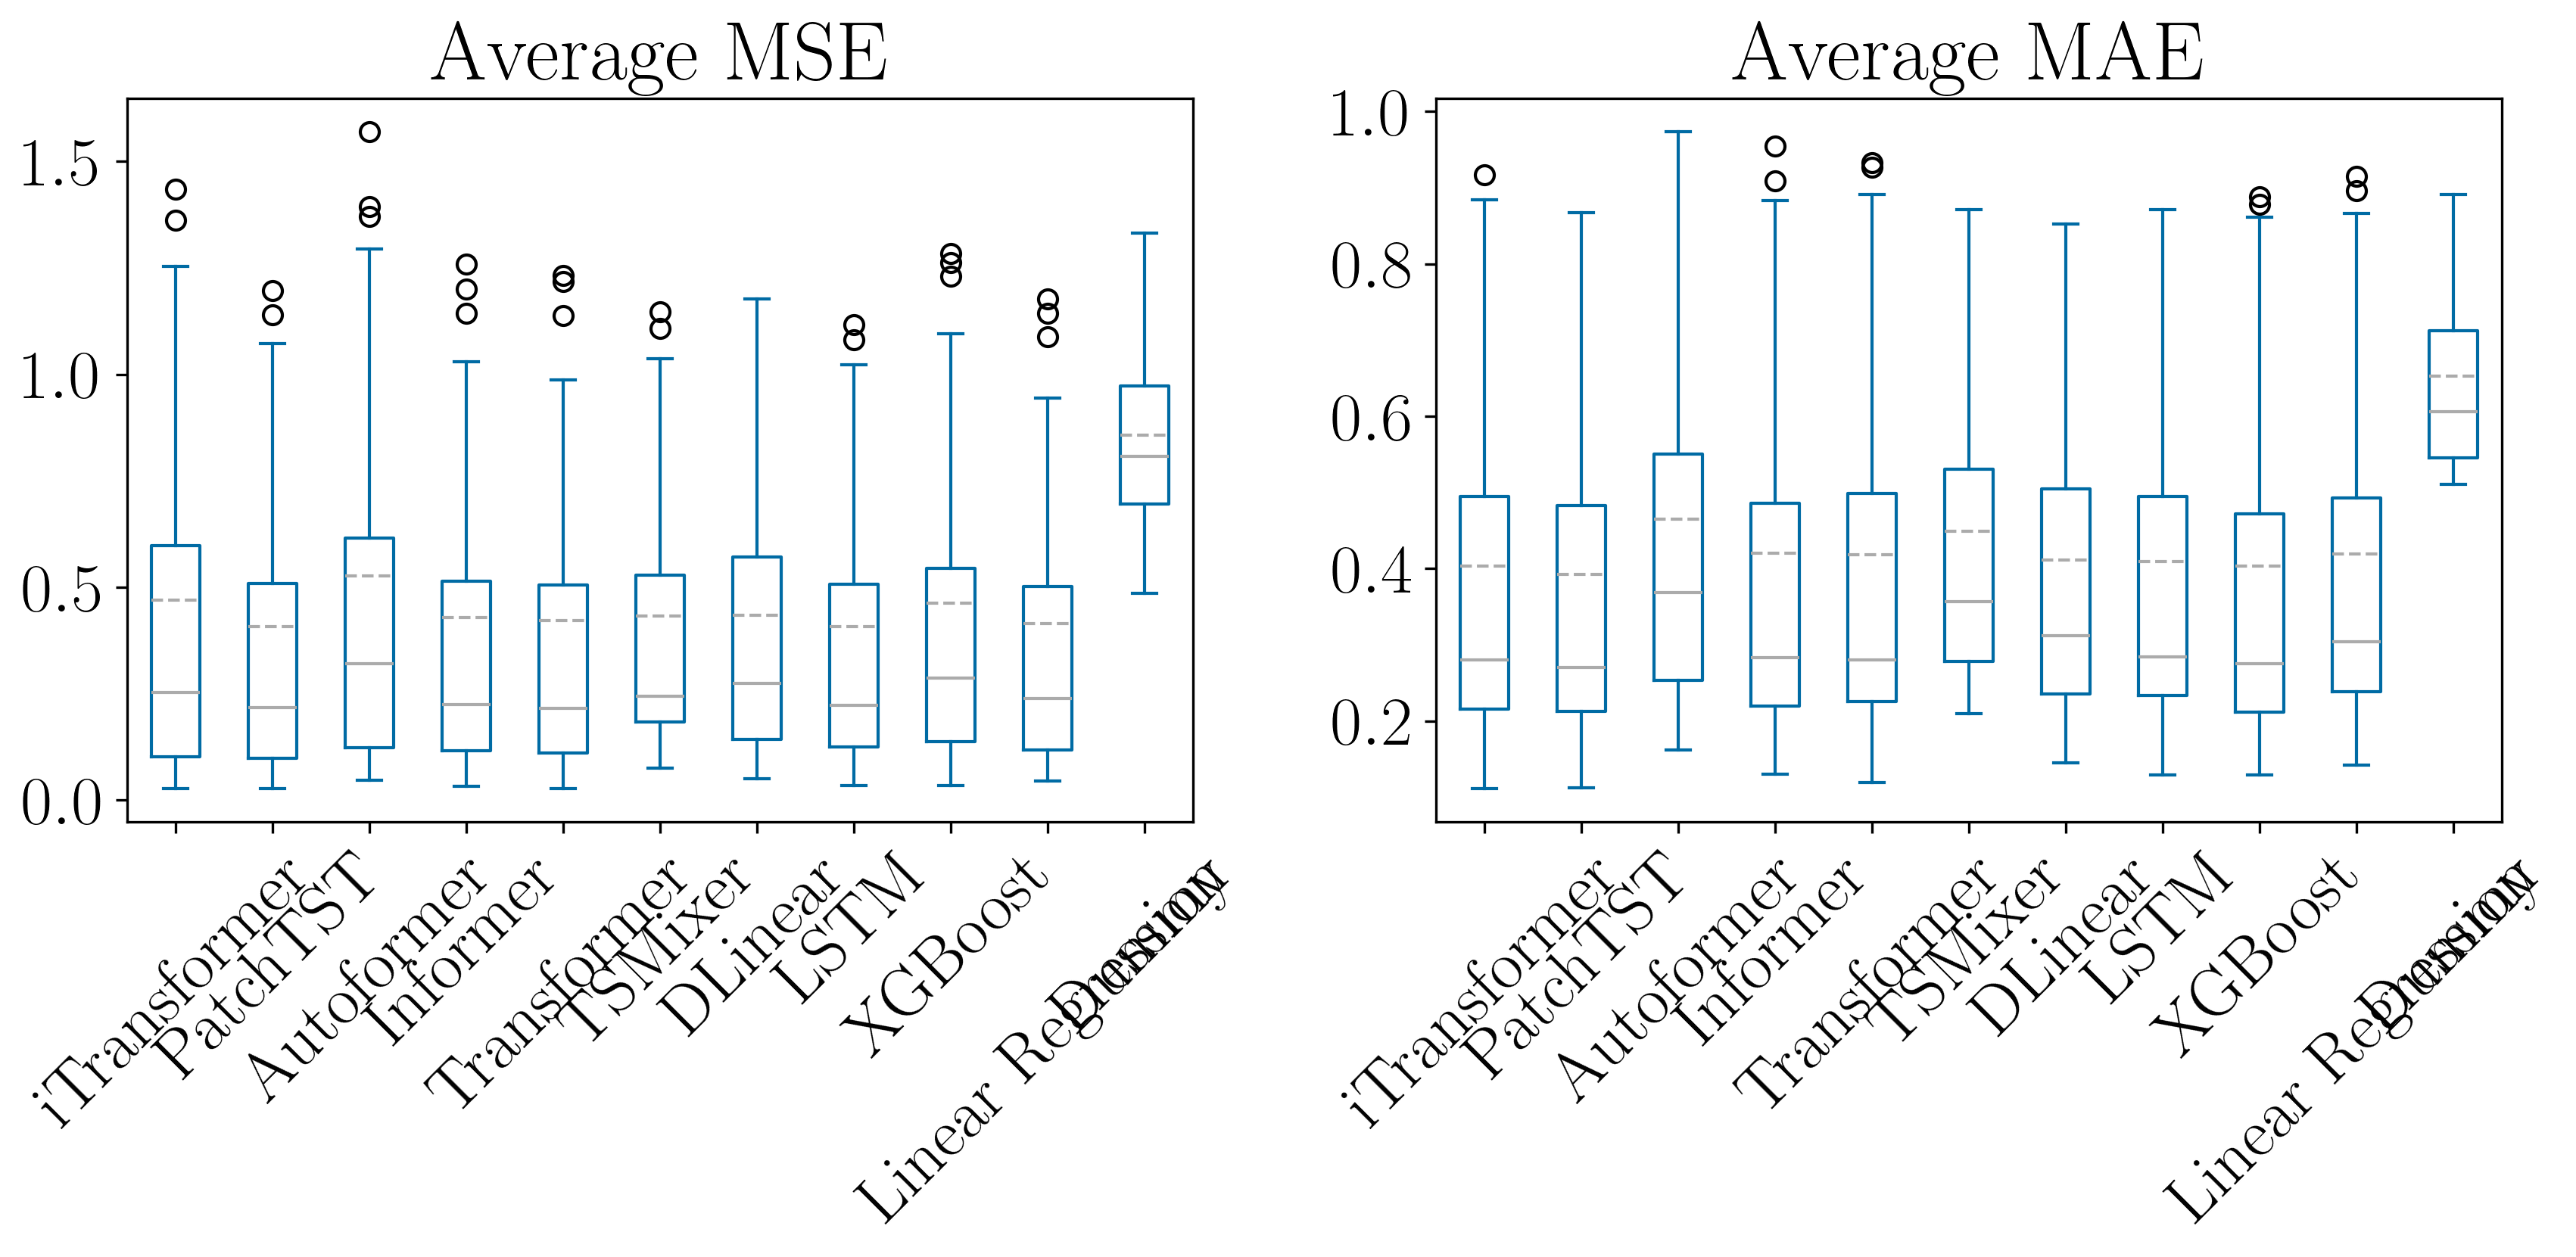

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Average MSE in the first subplot
benchmark_table_with_dummy.xs('MSE', level=1, axis=1).plot(kind="box", title="Average MSE", ax=axes[0], showmeans=True, meanline=True)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot Average MAE in the second subplot
benchmark_table_with_dummy.xs('MAE', level=1, axis=1).plot(kind="box", title="Average MAE", ax=axes[1], showmeans=True, meanline=True)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45) 

plt.tight_layout()
plt.show()

Dashed line is the mean </br> </br>
Solid line is the median

## MSE - horizon plot for each target

In [24]:
bms = []
bms_et = []
for target in targets:
    bm = benchmark_table.xs(target, level=0, axis=0)
    bm_mse = bm.xs('MSE', level=1, axis=1)
    bm_mae = bm.xs('MAE', level=1, axis=1)
    bms.append((bm_mse, bm_mae))

    bm_et = epoch_time_table.xs(target, level=0, axis=0)
    bm_e = bm_et.xs('epochs', level=1, axis=1)
    bm_t = bm_et.xs('time[min]', level=1, axis=1)
    bms_et.append((bm_e, bm_t))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


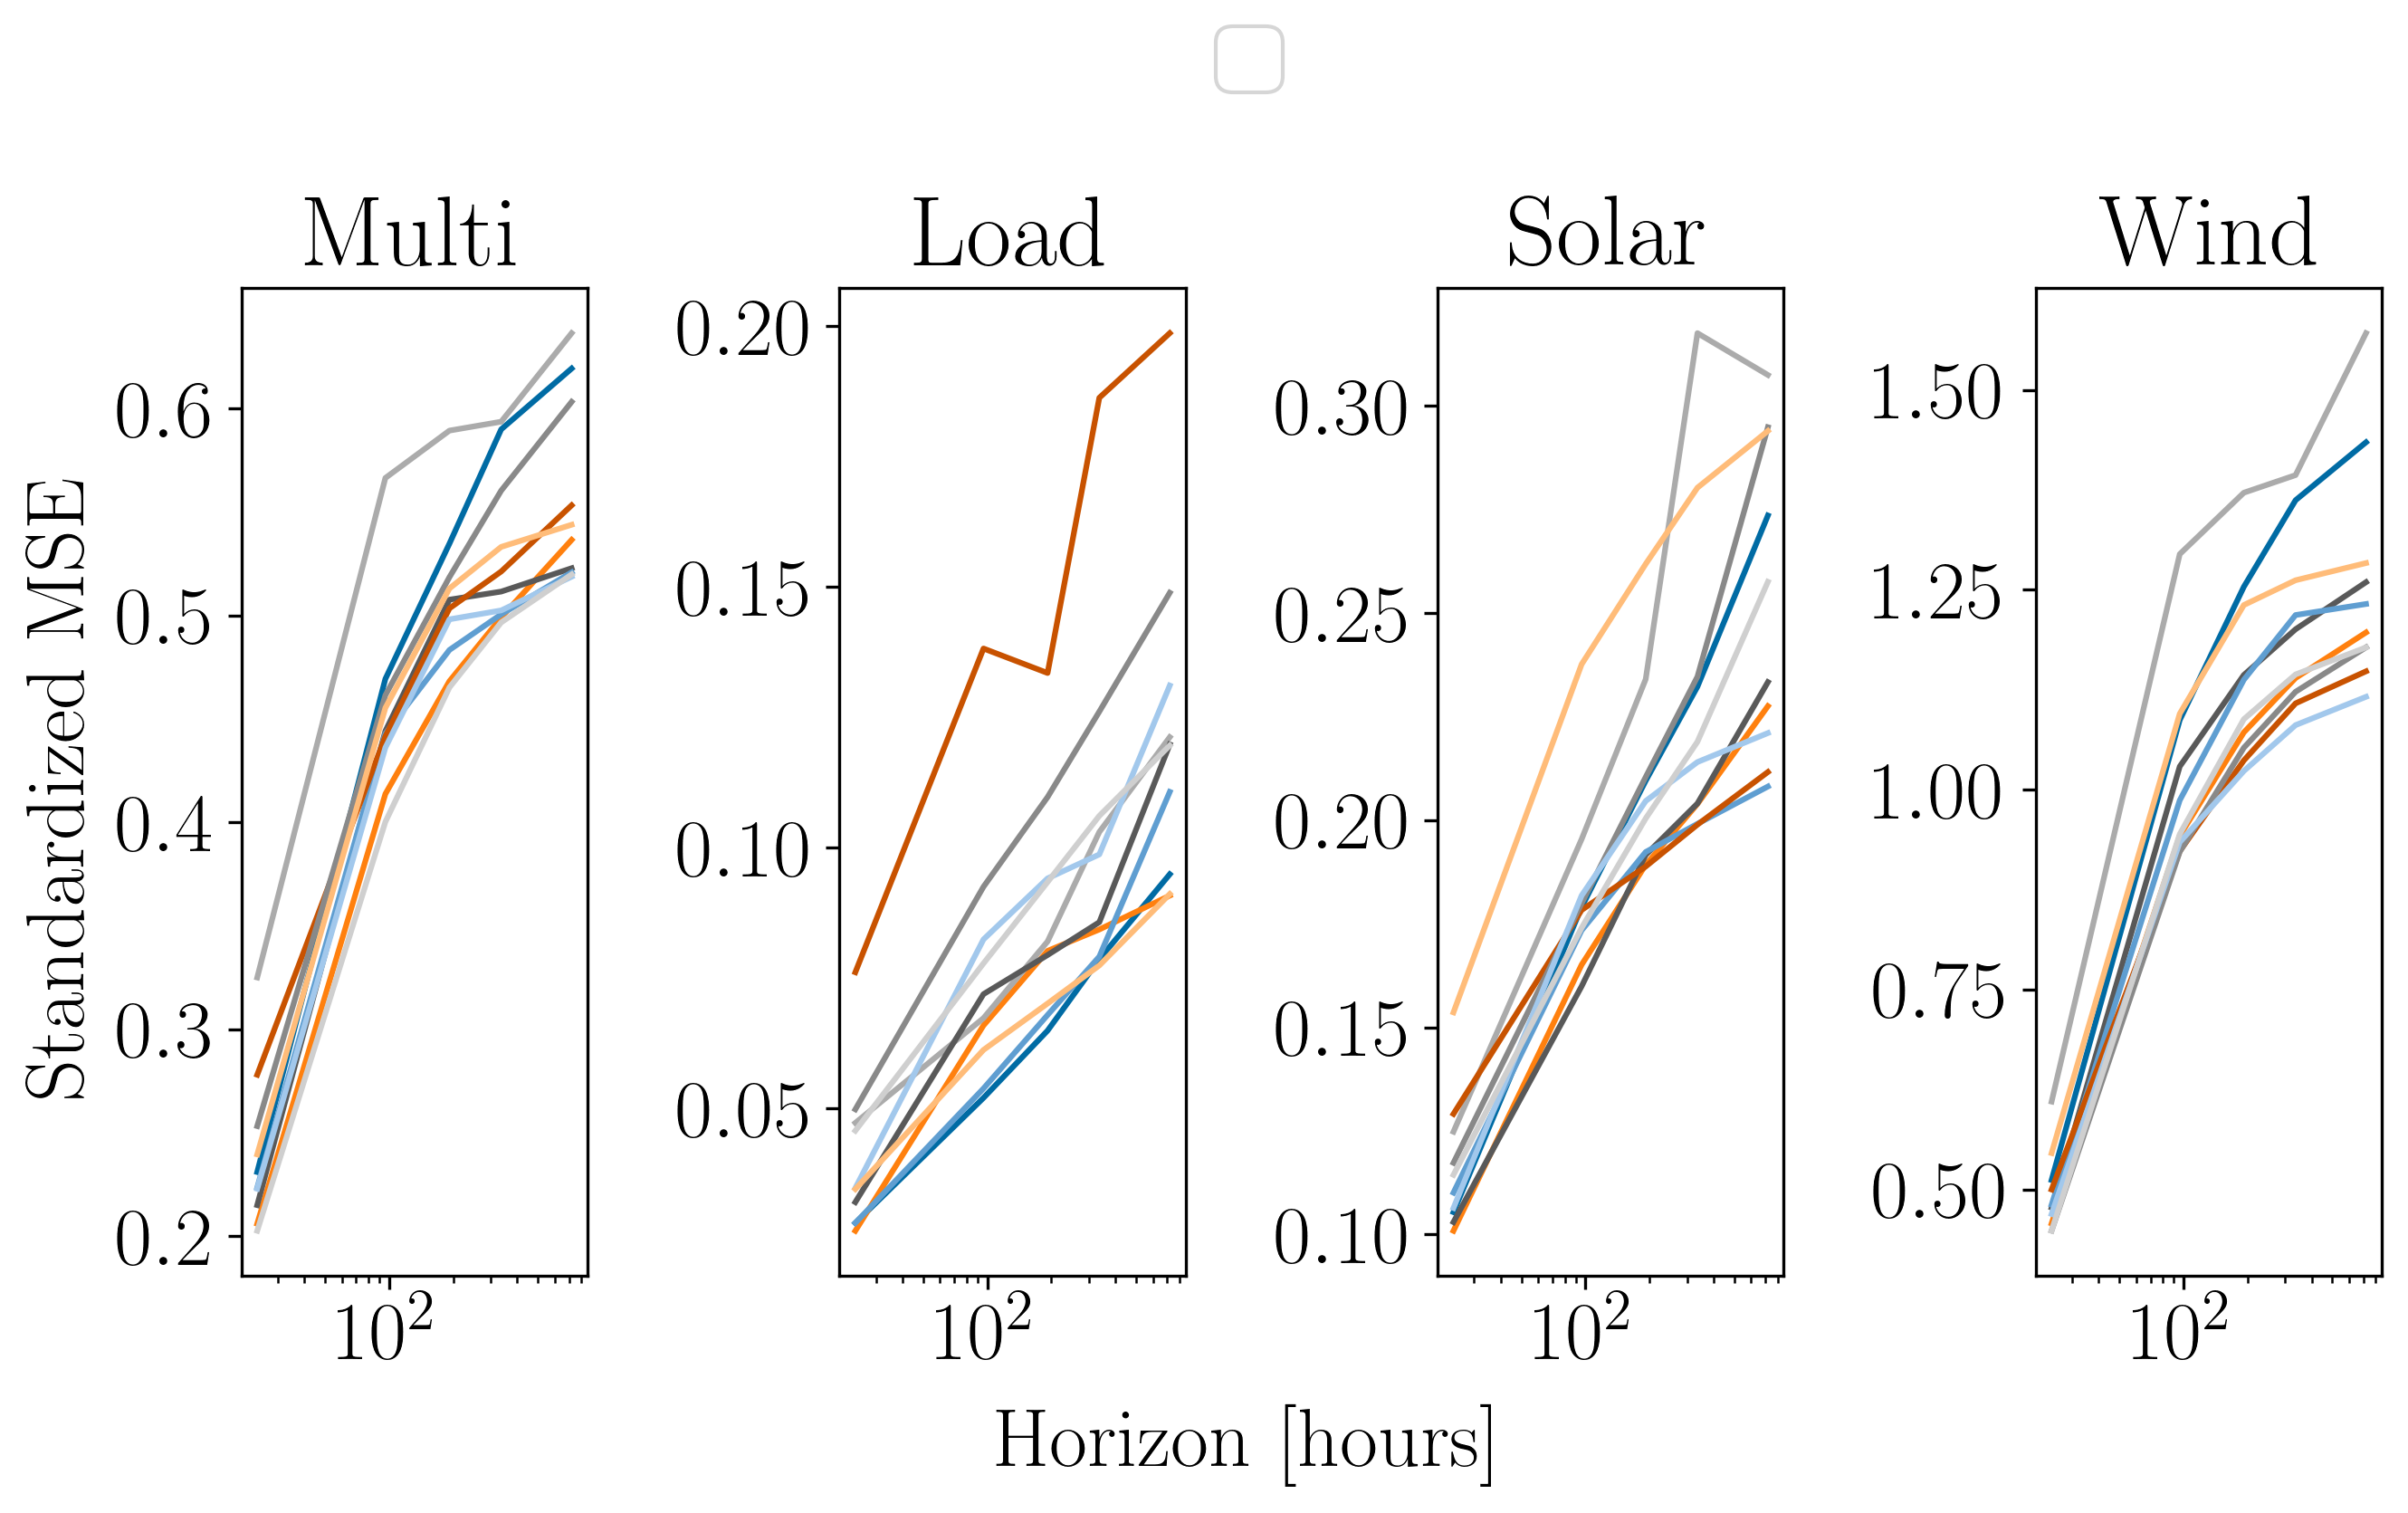

In [25]:



fig, ax = plt.subplots(1, 4, figsize=(9, 5))
# Define a list of colors for each model
#colors = ["#1f77b4", "#17becf", "#2ca02c", "#d62728", "#ff7f0e", "#9467bd", "#7f7f7f"] # purple: 
#colors= ["#1f77b4", "#17becf", "#2ca02c", "#e377c2","#bcbd22", "#7f7f7f"]
#print(bms[0])
#bms= [bm[0].drop(columns=["Autoformer", "TSMixer"]) for bm in bms]
#print(bms[0])
for i, (bm_mse, bm_mae) in enumerate(bms):
    
    for j in range(bm_mse.shape[1]):  # Iterate over the columns of bm_mse
        #print(bm_mse.columns[j])
        ax[i].plot(bm_mse.iloc[:, j], color = color_map[bm_mse.columns[j]], ) 

    ax[i].set_title(targets[i].capitalize())
    ax[i].set_xscale('log')
    #ax[row][col].set_yscale('log')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.09), ncol=4)

fig.text(0.5, 0, 'Horizon [hours]', ha='center')
fig.text(0, 0.5, 'Standardized MSE', va='center', rotation='vertical')
fig.tight_layout()
plt.show()


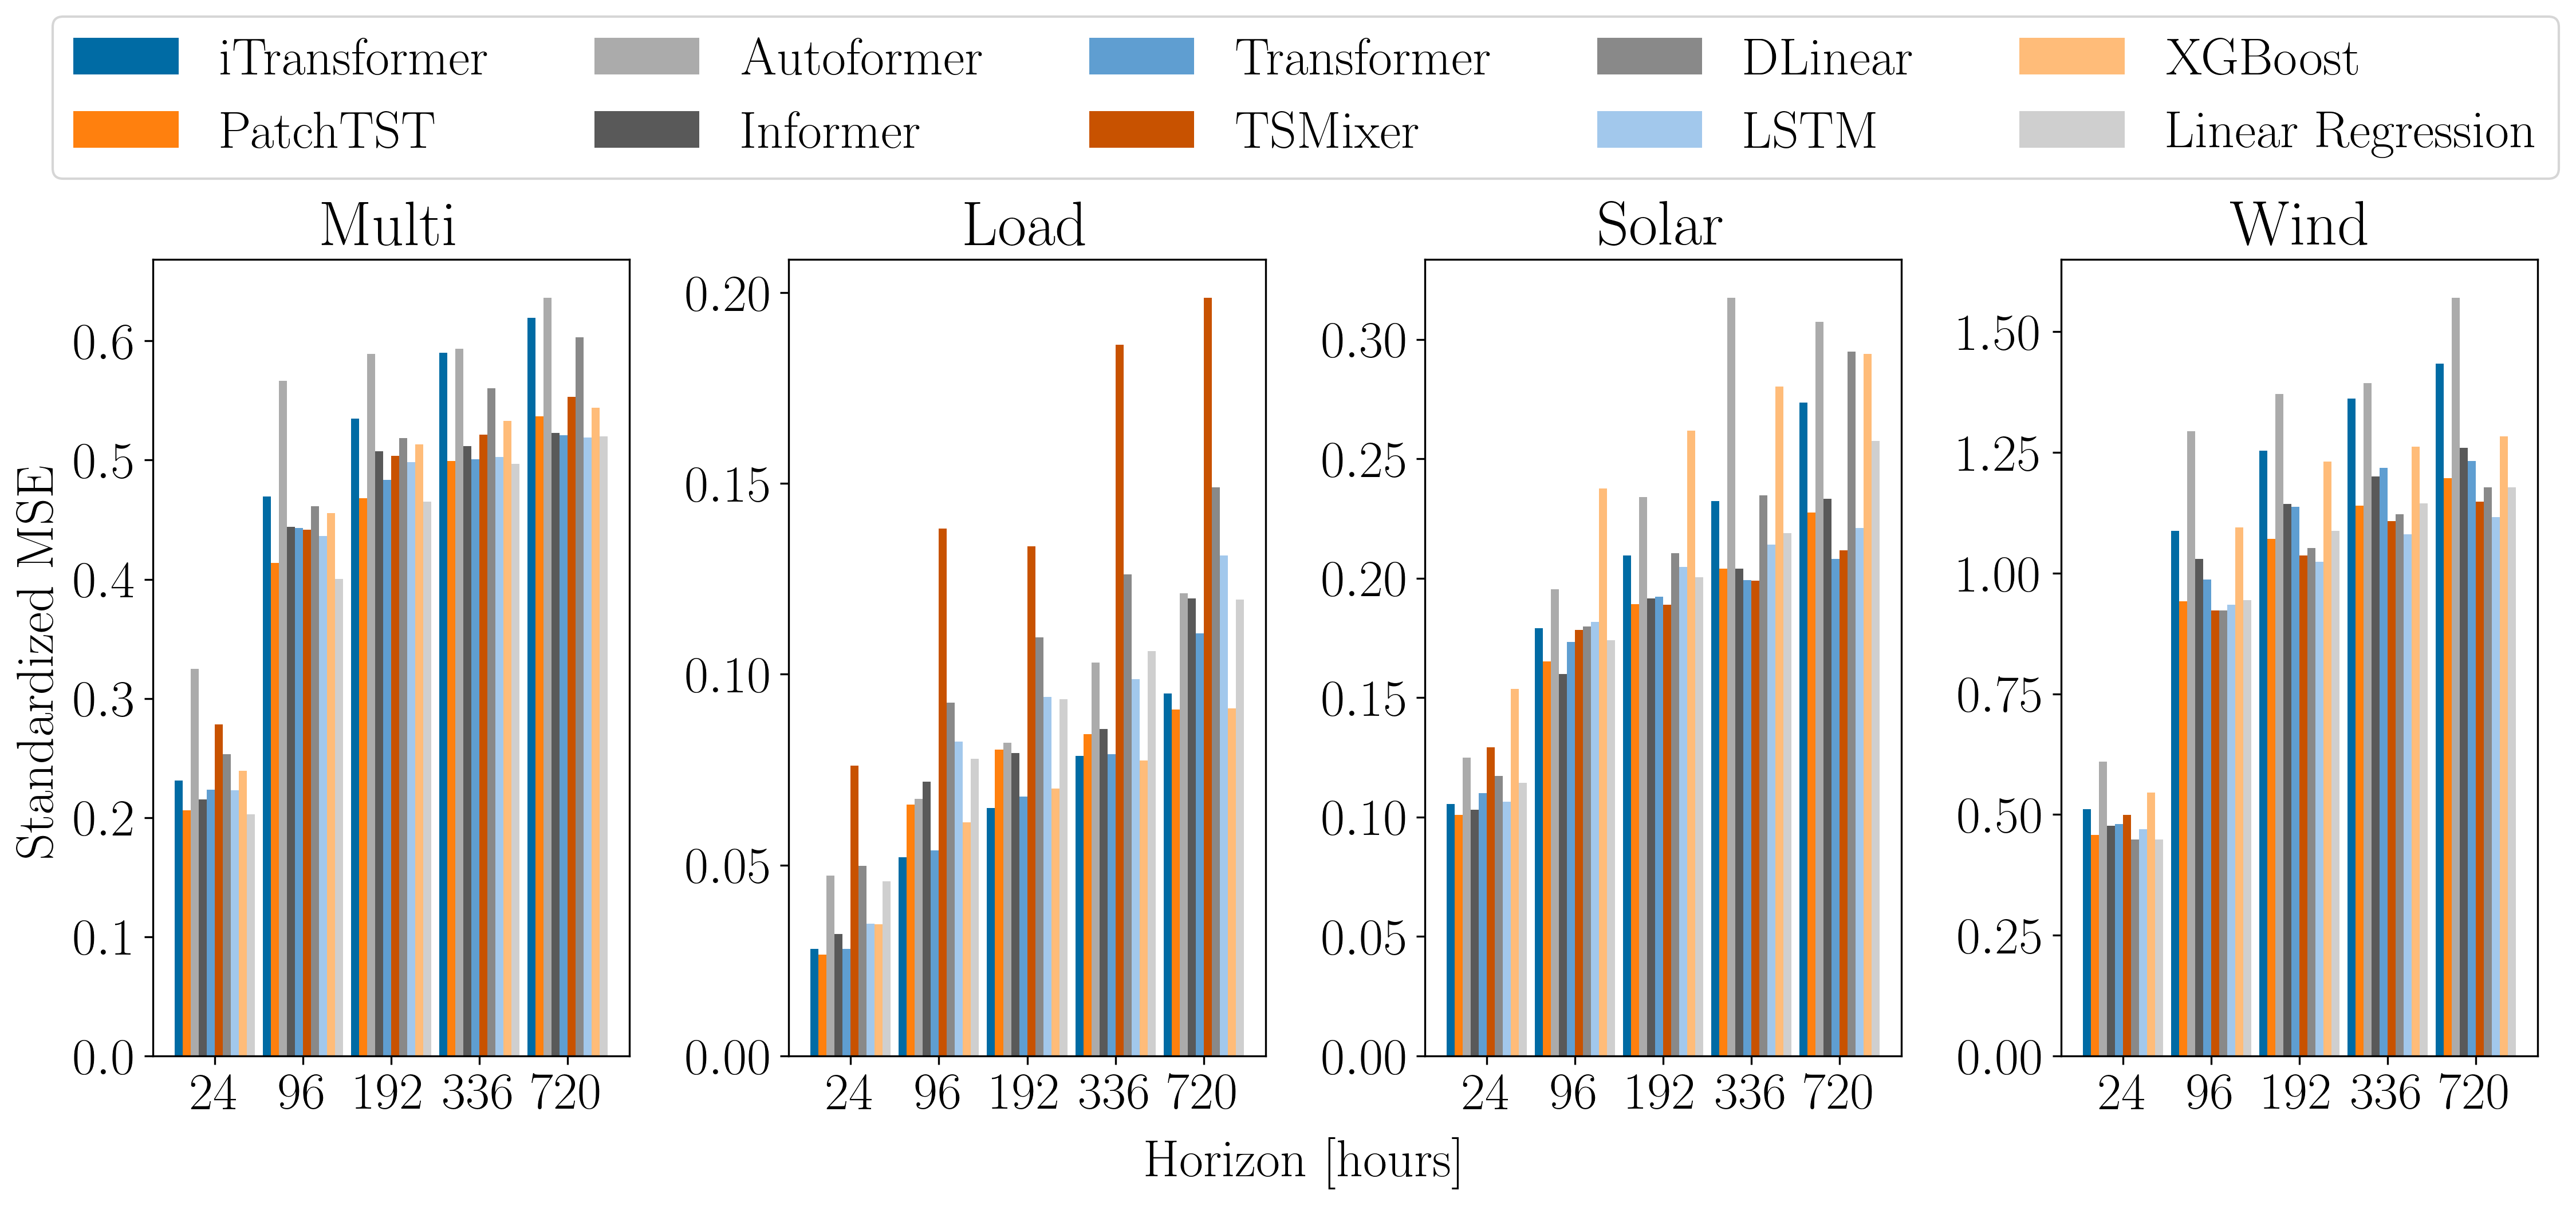

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 4, figsize=(15, 6))  # Adjusted size for better visibility of bars

# Example colors for the models
#colors = ["#1f77b4", "#17becf", "#2ca02c", "#e377c2", "#bcbd22", "#7f7f7f"]

# Example data
# Assuming each bm_mse for each i is a DataFrame where columns are models and rows are horizons
for i, (bm_mse, bm_mae) in enumerate(bms):
    #horizons = np.arange(bm_mse.shape[0])  # Number of horizons
    bar_width = 1 / (len(bm_mse.columns) + 1)  # Width of each bar, adjusted for number of models
    #bar_width = 0.1
    for j, model in enumerate(bm_mse.columns):
        # Position of each bar grouped by horizon
        positions = np.arange(bm_mse.shape[0]) + j * bar_width

        # Plotting the bar for each model at each horizon
        ax[i].bar(positions, bm_mse[model], width=bar_width, color=color_map[model], label=model if i == 0 else "")

    ax[i].set_title(targets[i].capitalize())
    ax[i].set_xticks(np.arange(bm_mse.shape[0]) + bar_width * (len(bm_mse.columns) - 1) / 2)  # Setting x-ticks to be at the center of the group
    #print(horizons)
    ax[i].set_xticklabels([f'{x}' for x in horizons])  # Assuming horizons are like 0h, 1h, etc.
    #ax[i].set_xlabel('Horizon [hours]')

#f.legend(loc='upper')  # Only one legend
fig.legend(models[:-1], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)

fig.text(0.5, 0, 'Horizon [hours]', ha='center')
fig.text(0, 0.5, 'Standardized MSE', va='center', rotation='vertical')
fig.tight_layout()
plt.show()


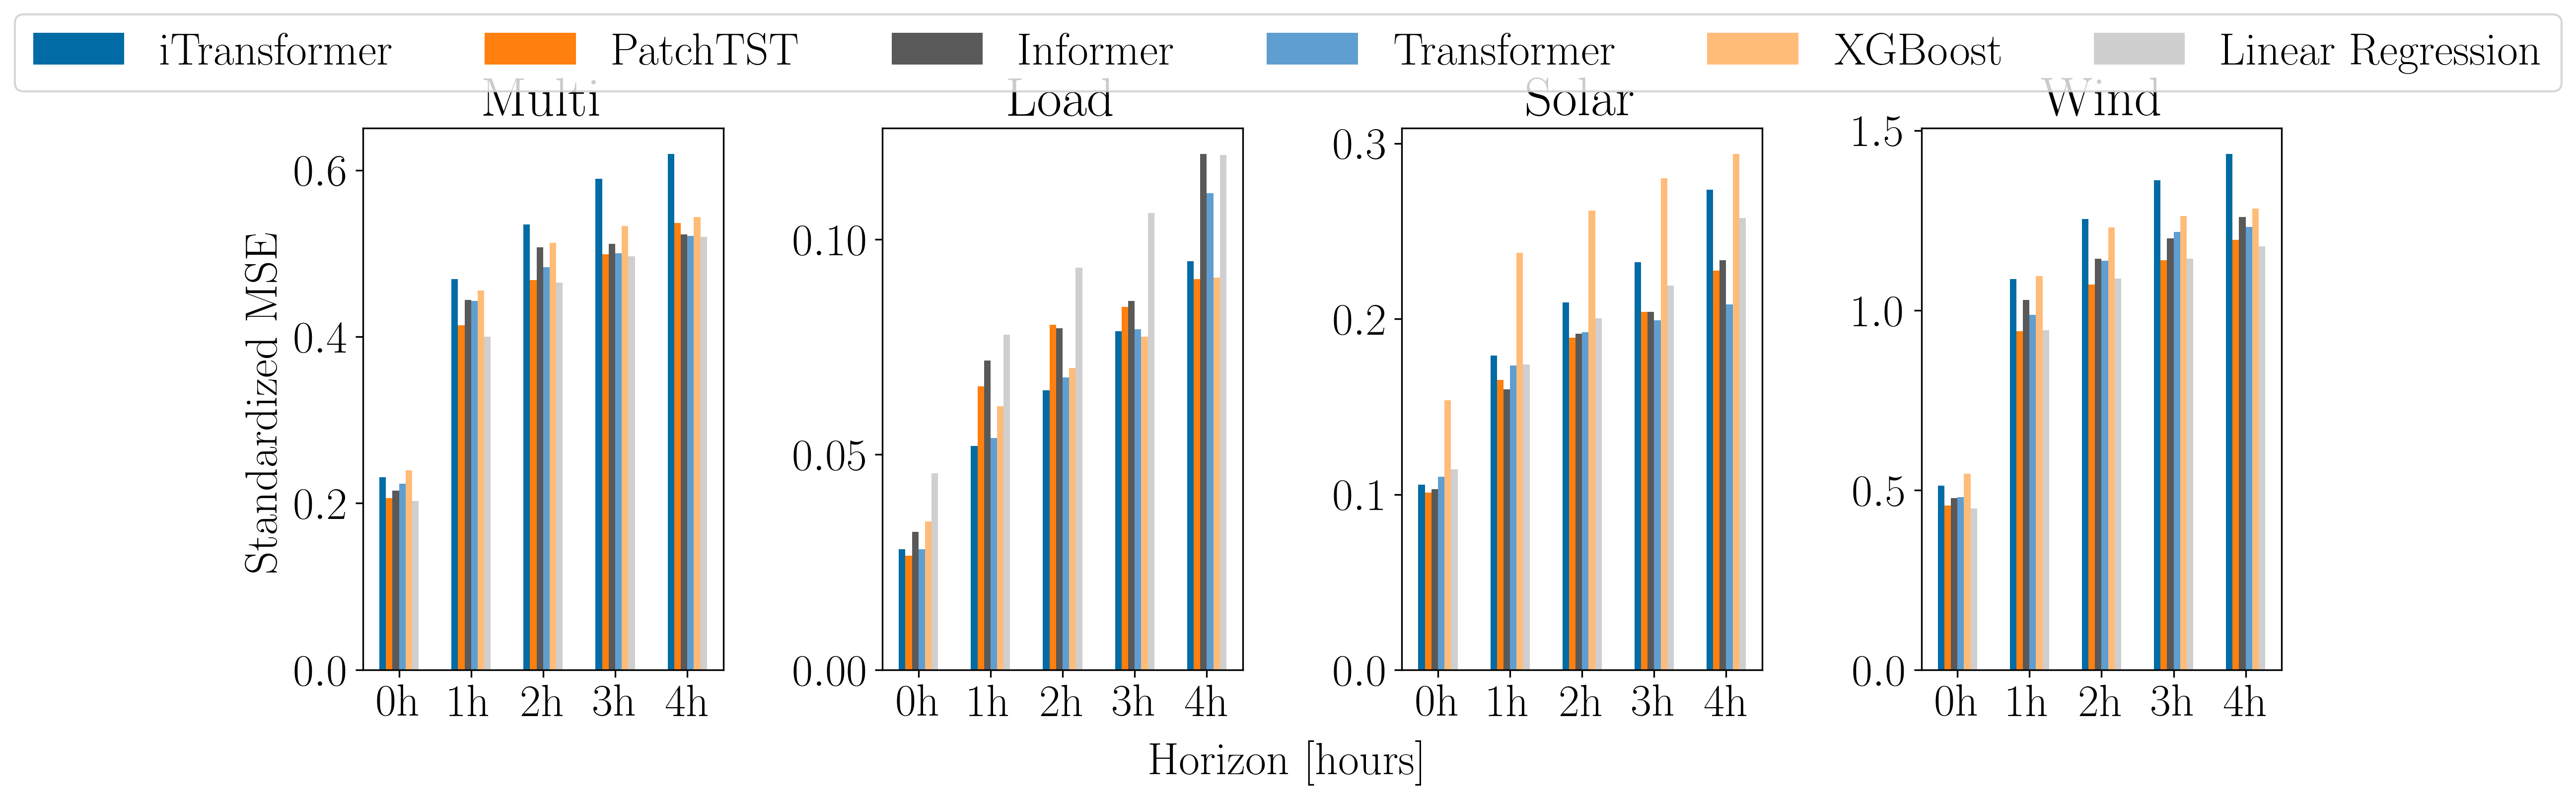

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 4, figsize=(14, 5))  # Adjusted size for better visibility of bars

# Example colors for the models
#colors = ["#1f77b4", "#17becf", "#2ca02c", "#e377c2", "#bcbd22", "#7f7f7f"]

# Example data
# Assuming each bm_mse for each i is a DataFrame where columns are models and rows are horizons
for i, (bm_mse, bm_mae) in enumerate(bms):
    horizons = np.arange(bm_mse.shape[0])  # Number of horizons
    bar_width = 1 / (len(bm_mse.columns) + 1)  # Width of each bar, adjusted for number of models


    # Criteria: Kick out models that have a bad IMP w/o wind or no BEST w/0 wind
    bm_mse= bm_mse.drop(columns=["Autoformer", "LSTM", "DLinear", "TSMixer"])
    for j, model in enumerate(bm_mse.columns):
        # Position of each bar grouped by horizon
        positions = horizons + j * bar_width

        # Plotting the bar for each model at each horizon
        ax[i].bar(positions, bm_mse[model], width=bar_width, color=color_map[model] , label=model if i == 0 else "")

    ax[i].set_title(targets[i].capitalize())
    ax[i].set_xticks(horizons + bar_width * (len(bm_mse.columns) - 1) / 2)  # Setting x-ticks to be at the center of the group
    ax[i].set_xticklabels([f'{x}h' for x in horizons])  # Assuming horizons are like 0h, 1h, etc.
    #ax[i].set_xlabel('Horizon [hours]')

#f.legend(loc='upper')  # Only one legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=10)

fig.text(0.5, 0, 'Horizon [hours]', ha='center')
fig.text(0, 0.5, 'Standardized MSE', va='center', rotation='vertical')
fig.tight_layout()
plt.show()


In [28]:
import plotly.express as px
import pandas as pd

bm_mse = bms[0][0]
cols = bm_mse.columns
bm_mse["horizon"] = bm_mse.index.astype(str)

#print(bm_mse)

# Create the initial plot with the first dataset
fig = px.line_polar(bm_mse, r=cols[0], theta='horizon', line_close=True)

# Update color for the first dataset
fig.update_traces(line_color="#E69F00")
colors = [
    "#E69F00",  # Orange
    "#56B4E9",  # Sky Blue
    "#009E73",  # Bluish Green
    "#F0E442",  # Yellow
    "#0072B2",  # Blue
    "#D55E00",  # Vermilion
    "#CC79A7",  # Reddish Purple
    "#999999",  # Grey
    "#000000",  # Black
    "#FFFFFF"   # White
]


# Add the new data as a second trace
for i in range(1, len(cols)-1):
    new_trace = px.line_polar(bm_mse, r=cols[i], theta="horizon", line_close=True).data[0]
    new_trace.line.color = colors[i]  # Setting color for the new trace
    fig.add_trace(new_trace)


## Change background to white
#fig.update_layout(
#    polar=dict(
#        bgcolor="white",
#        radialaxis=dict(
#            gridcolor="black",  # Adding this to improve visibility of the grid on white background
#            linecolor="black"
#        ),
#        angularaxis=dict(
#            gridcolor="black",
#            linecolor="black"
#        )
#    ),
#    paper_bgcolor='white'  # Sets the area outside of the plot to white
#)

# Increase the size of the figure
fig.update_layout(
    width=800,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Show the updated plot
fig.show()

# Show the plot
#fig.show()


## MSE - train_time plot for each target and each horizon

ValueError: x and y must be the same size

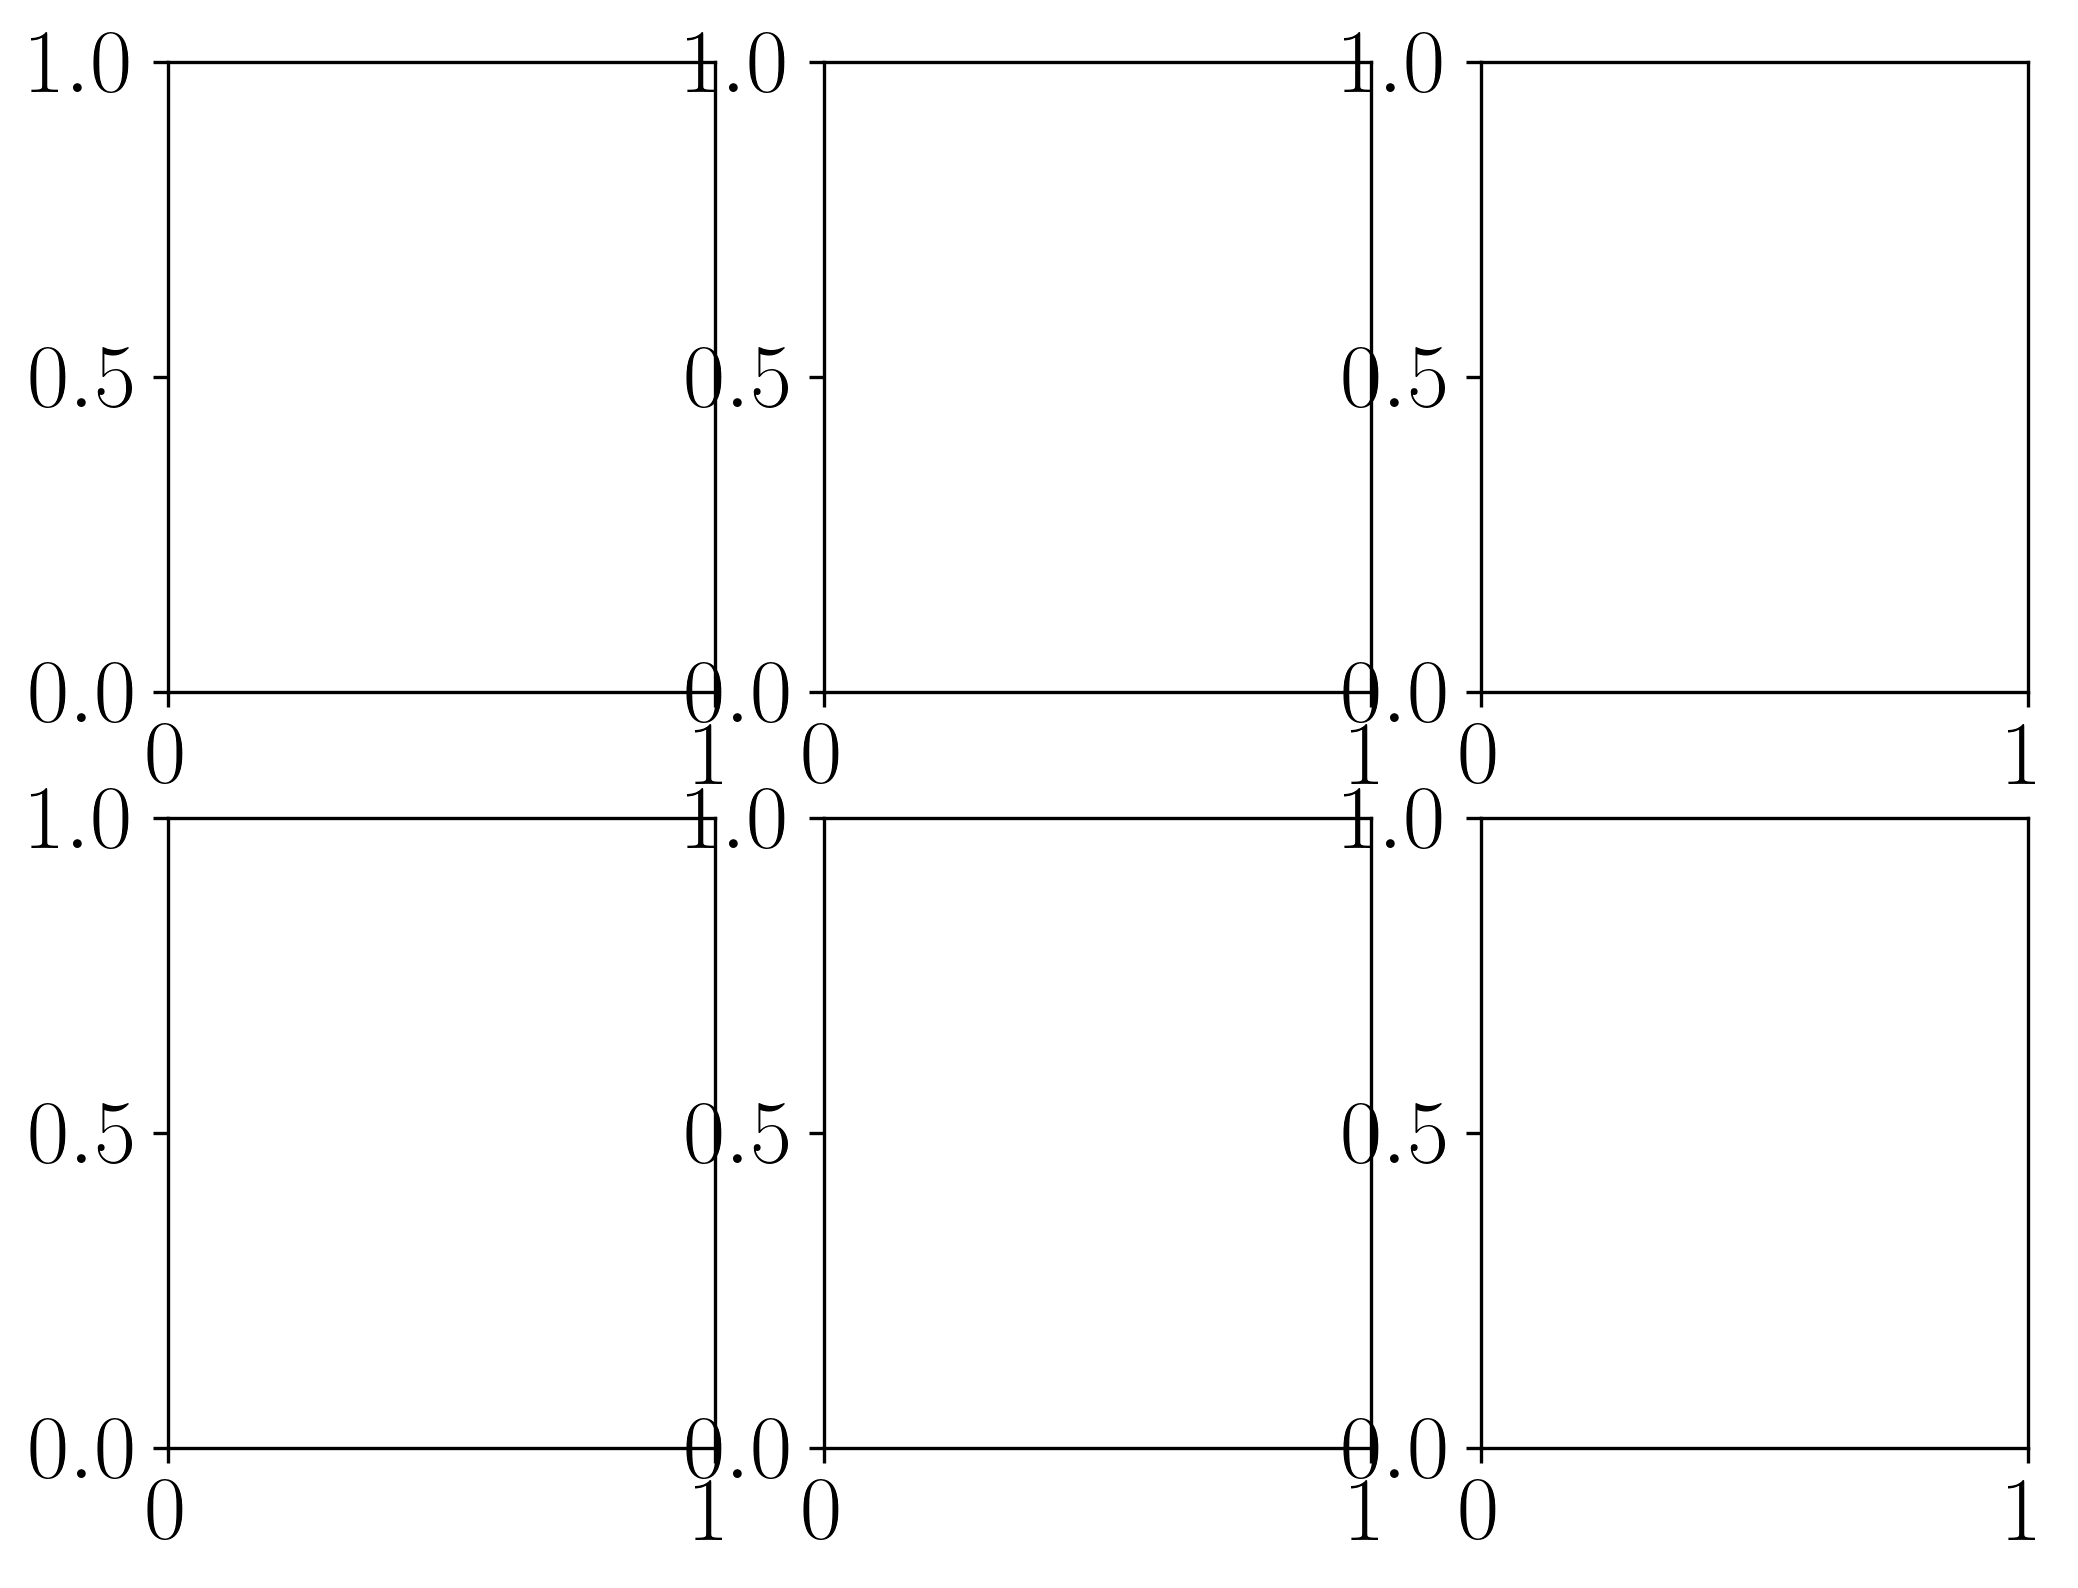

In [29]:
import numpy as np


# For each target
for i, ((bm_mse, bm_mae),(bm_e, bm_t)) in enumerate(zip(bms, bms_et)):
    
    # For each horizon: Plot mse vs time for all models
    fig, ax = plt.subplots(2,3, figsize=(8, 6))
    for j, horizon in enumerate(horizons):
        row, col = divmod(j, 3)
        ax[row][col].scatter(bm_t.iloc[j].values, bm_mse.iloc[j].values)# c=colors[:-1])
        ax[row][col].set_title('MSE ' + targets[i] + ', horizon ' + horizons[j])
        ax[row][col].set_xlabel('Time [min]')
        ax[row][col].set_ylabel('MSE')
    fig.tight_layout()
    #fig.legend(models[:-1], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)

In [ ]:
counts = benchmark_table
b_mse = benchmark_table.xs("MSE", axis=0, level=1)
is_min_mse = b_mse == b_mse.min()
#    s_mae = s.xs("MAE", axis=0, level=1)
#    is_min_mae = s_mae == s_mae.min()####

#    is_min = s.copy()
    
#    is_min.loc[:,"MSE"] = is_min_mse.values
#    is_min.loc[:,"MAE"] = is_min_mae.values

#    return ['background-color: green' if v else '' for v in is_min]

KeyError: 'MSE'